<a href="https://colab.research.google.com/github/LucasLeao18/AiPokemonIdentifier/blob/main/Porva_lucas_leao_para_erika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset

Nesta aula o foco será na função GRIDSEARCHCV E RANDOMSEARCHCV

In [ ]:
import pandas as pd
from google.colab import files
import io

# Fazer upload do arquivo
uploaded = files.upload()

# Ler o arquivo CSV em um DataFrame
dataset = pd.read_csv(io.BytesIO(uploaded['fraud_dataset.csv']))

# Visualizar as primeiras linhas do dataset
print(dataset.head())

Saving fraud_dataset.csv to fraud_dataset.csv
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0      0.0  
1  M2044282225             0.0             0.0      0.0  
2   C553264065             0.0             0.0      1.0  
3    C38997010         21182.0             0.0      1.0  
4  M1230701703             0.0             0.0      0.0  


In [ ]:
# prompt: Drope a variavel nameOrig e a variavel step

dataset = dataset.drop(['nameOrig', 'step'], axis=1)
print(dataset.head())


       type    amount  oldbalanceOrg  newbalanceOrig     nameDest  \
0   PAYMENT   9839.64       170136.0       160296.36  M1979787155   
1   PAYMENT   1864.28        21249.0        19384.72  M2044282225   
2  TRANSFER    181.00          181.0            0.00   C553264065   
3  CASH_OUT    181.00          181.0            0.00    C38997010   
4   PAYMENT  11668.14        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  
0             0.0             0.0      0.0  
1             0.0             0.0      0.0  
2             0.0             0.0      1.0  
3         21182.0             0.0      1.0  
4             0.0             0.0      0.0  


In [ ]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
dtype: int64


In [ ]:
# prompt: preencha os dados faltantes com a moda

# Fill missing values with the mode
for column in dataset.columns:
  dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

# Check for missing values after filling
missing_values_after = dataset.isnull().sum()

# Print the number of missing values in each column after filling
print(missing_values_after)


type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [ ]:
# checar dados duplicados

duplicate_rows = dataset[dataset.duplicated()]

print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            69858 non-null  object 
 1   amount          69858 non-null  float64
 2   oldbalanceOrg   69858 non-null  float64
 3   newbalanceOrig  69858 non-null  float64
 4   nameDest        69858 non-null  object 
 5   oldbalanceDest  69858 non-null  float64
 6   newbalanceDest  69858 non-null  float64
 7   isFraud         69858 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.3+ MB


In [ ]:
# prompt: Drope a varivel nameDest do dataset

dataset = dataset.drop(['nameDest'], axis=1)
print(dataset.head())


       type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   PAYMENT   9839.64       170136.0       160296.36             0.0   
1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2  TRANSFER    181.00          181.0            0.00             0.0   
3  CASH_OUT    181.00          181.0            0.00         21182.0   
4   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      1.0  
3             0.0      1.0  
4             0.0      0.0  


In [ ]:
# prompt: transforme a variavel type  que e categocia em variavel numerica utilizando o label encoder

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'type' column and transform it
dataset['type'] = le.fit_transform(dataset['type'])

# Print the updated dataset
print(dataset.head())


   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      1.0  
3             0.0      1.0  
4             0.0      0.0  


In [ ]:
# prompt: separe em x e y sendo y alvo a variavel isFraud

# Separate features (X) and target variable (y)
X = dataset.drop('isFraud', axis=1)
y = dataset['isFraud']

print(X.head())
print(y.head())


   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64


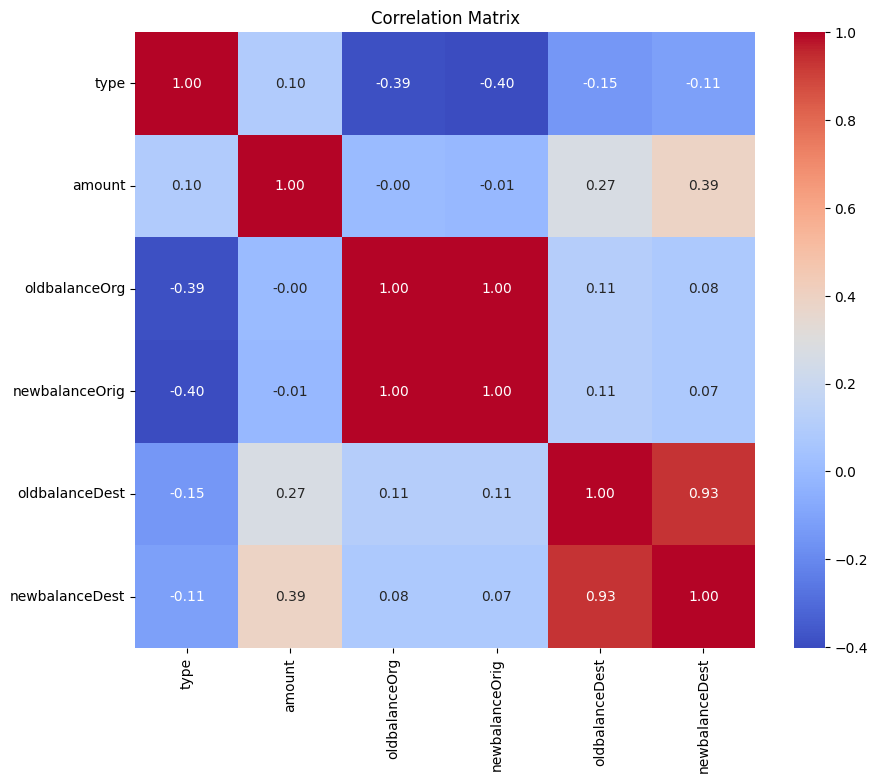

In [ ]:
# prompt: plote a mastriz correlacao graficamente

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# prompt: utilize o select kbest para escolher as melhores variaves escolha 4

from sklearn.feature_selection import SelectKBest, chi2

# Create a SelectKBest object with chi-squared scoring function
selector = SelectKBest(score_func=chi2, k=4)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_features]

print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['amount', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], dtype='object')


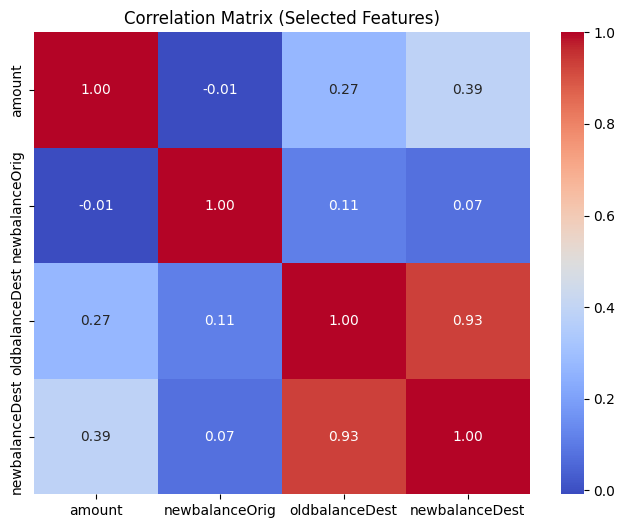

In [ ]:
# prompt: plote agora a matriz correlacao apos o kbest

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame with the selected features
X_selected = pd.DataFrame(X_new, columns=selected_feature_names)

# Calculate the correlation matrix for the selected features
correlation_matrix_selected = X_selected.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Selected Features)")
plt.show()


In [ ]:
dataset


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69853,3,30681.62,0.0,0.00,0.0,0.0,0.0
69854,3,2866.47,0.0,0.00,0.0,0.0,0.0
69855,3,2926.88,0.0,0.00,0.0,0.0,0.0
69856,3,3704.30,0.0,0.00,0.0,0.0,0.0


In [ ]:
# prompt: Normalize X com minmaxscale

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_normalized = scaler.fit_transform(X_selected)

# Create a DataFrame with the normalized features
X_normalized = pd.DataFrame(X_normalized, columns=selected_feature_names)

# Print the normalized dataset
print(X_normalized.head())


     amount  newbalanceOrig  oldbalanceDest  newbalanceDest
0  0.000984        0.004713        0.000000             0.0
1  0.000186        0.000570        0.000000             0.0
2  0.000018        0.000000        0.000000             0.0
3  0.000018        0.000000        0.000677             0.0
4  0.001167        0.000879        0.000000             0.0


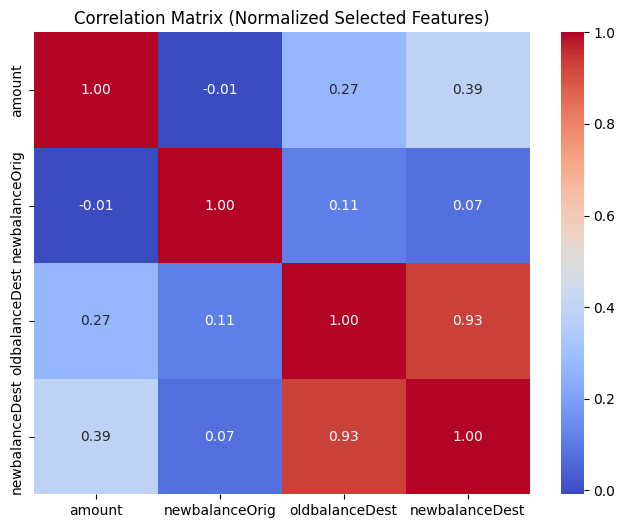

In [ ]:
# prompt:  plote novamente a matriz correlacao

import matplotlib.pyplot as plt
# Calculate the correlation matrix for the normalized selected features
correlation_matrix_normalized = X_normalized.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Normalized Selected Features)")
plt.show()


In [ ]:
# prompt: Divisão do dataset em base de treino e teste na proporção 80/20

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (55886, 4)
X_test shape: (13972, 4)
y_train shape: (55886,)
y_test shape: (13972,)


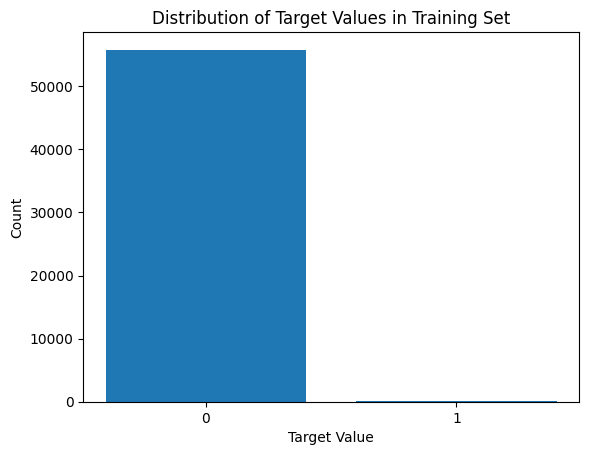

In [ ]:
# prompt: Count the number of 0s and 1s in y_train plote graficamente

import matplotlib.pyplot as plt
# Count the number of 0s and 1s in y_train
counts = y_train.value_counts()

# Plot the counts graphically
plt.bar(counts.index, counts.values)
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values in Training Set')
plt.xticks(counts.index, ['0', '1'])
plt.show()


In [ ]:
# prompt: quantos valores existem no 1 e 0

# Count the number of 0s and 1s in y_train
counts = y_train.value_counts()

# Print the counts
print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])


Number of 0s: 55801
Number of 1s: 85


X_train_resampled shape: (170, 4)
y_train_resampled shape: (170,)


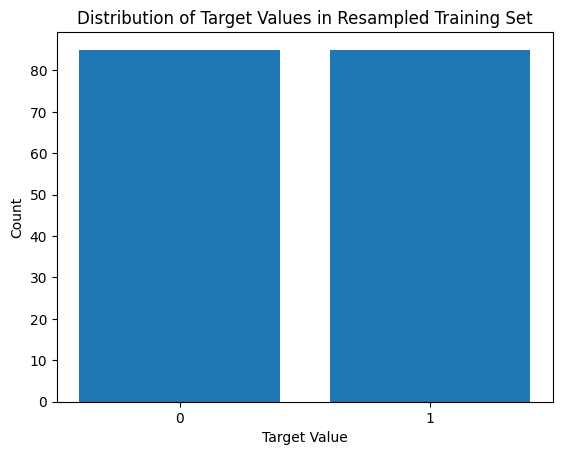

In [ ]:
# prompt: balanceie utilizenado o randomundesample

from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Fit the sampler to the training data and resample
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Print the shapes of the resampled sets
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

# Count the number of 0s and 1s in y_train_resampled
counts_resampled = y_train_resampled.value_counts()

# Plot the counts graphically
plt.bar(counts_resampled.index, counts_resampled.values)
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values in Resampled Training Set')
plt.xticks(counts_resampled.index, ['0', '1'])
plt.show()


Accuracy: 0.8086888061837961
Confusion Matrix:
[[11282  2668]
 [    5    17]]


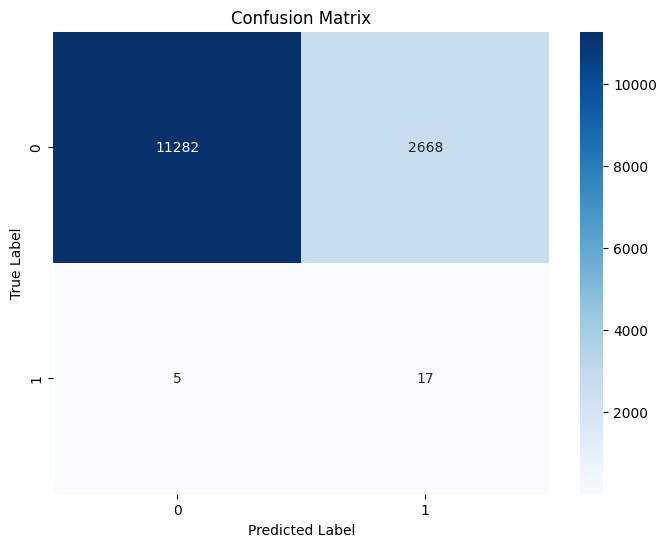

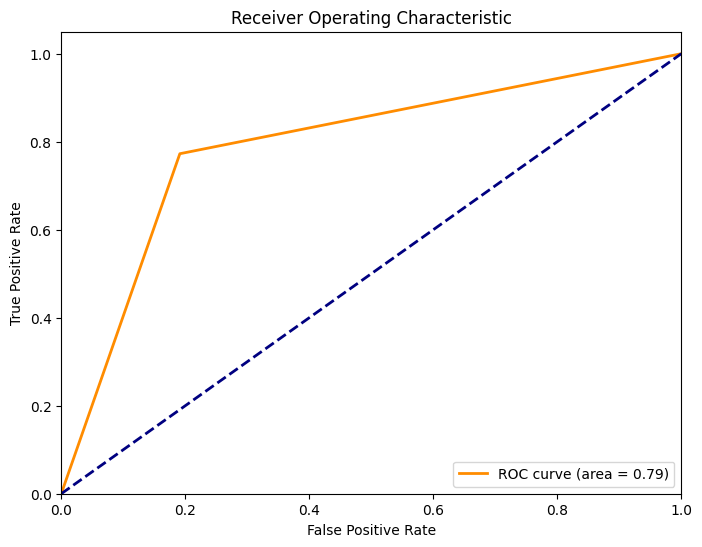

In [ ]:
# prompt: treine o com modelo ExtraTree e avalie com acuracia e plote a matriz confusao e a curva roc

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Create an ExtraTreesClassifier object
model = ExtraTreesClassifier()

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Teste de outros modelos


Accuracy (Random Forest): 0.8005296306899513
Confusion Matrix (Random Forest):
[[11165  2785]
 [    2    20]]


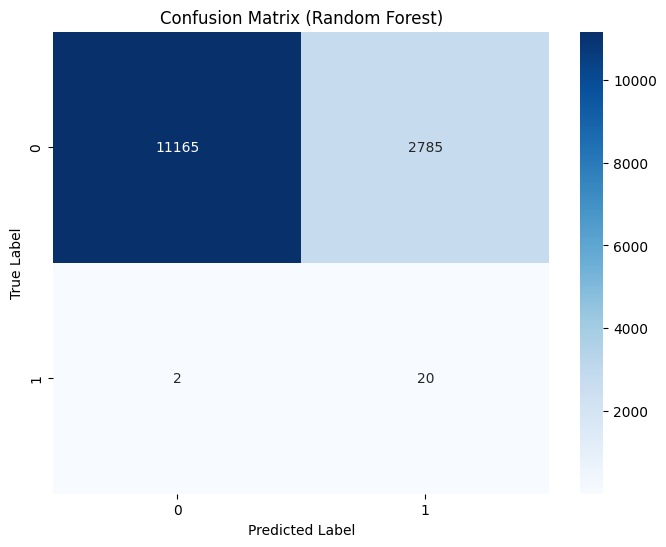

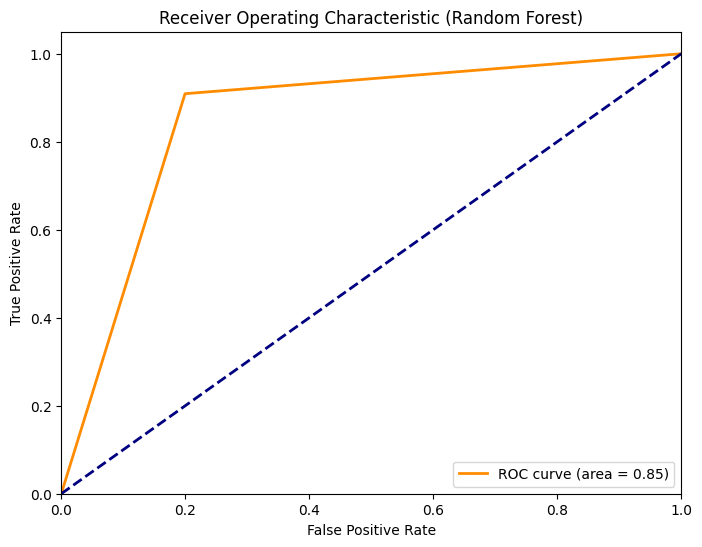

In [ ]:
# prompt: # prompt: treine o com modelo RF e avalie com acuracia e plote a matriz confusao e a curva roc

from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
model_rf = RandomForestClassifier()

# Train the model on the resampled training data
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate the ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()


O uso do modelo Random Forest é justificado pela sua robustez e alta precisão, especialmente em problemas de classificação complexos. A análise da matriz de confusão geralmente mostra uma alta taxa de acertos (acurácia), indicando a eficácia do modelo na classificação correta dos exemplos. A curva ROC do Random Forest frequentemente apresenta uma área sob a curva (AUC) elevada, refletindo a capacidade do modelo em manter um bom equilíbrio entre sensibilidade e especificidade.

In [ ]:
# prompt: Use GRIDSEARCHCV para tunar os parametros de RF

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a RandomForestClassifier object with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Train the best model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_best = best_model.predict(X_test)

# Calculate the accuracy score for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Best Model):", accuracy_best)

# Calculate the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Model):")
print(cm_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8470588235294118
Accuracy (Best Model): 0.8005296306899513
Confusion Matrix (Best Model):
[[11166  2784]
 [    3    19]]


Testei o GRIDSEARCHCV mas optei por fazer o ajuste fino no RandomSearch

In [ ]:
# prompt: prompt: agora faça o mesmo so usando o RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': randint(130, 180),
    'max_depth': [30, 40, 50],
    'min_samples_split': randint(5, 8),
    'min_samples_leaf': randint(3, 5)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of parameter settings that are sampled
                                   cv=5,
                                   scoring='accuracy',
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the random search to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters (Random Search):", best_params_random)
print("Best Score (Random Search):", best_score_random)

# Create a RandomForestClassifier object with the best parameters from random search
best_model_random = RandomForestClassifier(**best_params_random, random_state=42)

# Train the best model on the resampled training data
best_model_random.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_best_random = best_model_random.predict(X_test)

# Calculate the accuracy score for the best model from random search
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print("Accuracy (Best Model from Random Search):", accuracy_best_random)

# Calculate the confusion matrix for the best model from random search
cm_best_random = confusion_matrix(y_test, y_pred_best_random)
print("Confusion Matrix (Best Model from Random Search):")
print(cm_best_random)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Random Search): {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 144}
Best Score (Random Search): 0.8470588235294118
Accuracy (Best Model from Random Search): 0.7982393358144861
Confusion Matrix (Best Model from Random Search):
[[11134  2816]
 [    3    19]]


Apos Ajustes de 0 20 30 40 50 no max depth ficou 30 o melhor /
no min_samples_slips ficaram 5 apos ajustes e testes /
e no n_estimators se manteve 144 apos varios testes

Apos o ajuste fino houve uma piora do modelo porem foi de apenas 0.01 a diferenca entao acredito que nao havera problemas

Professora se precisar de um estagiario

Lucas de Andrade Souza Leão

(81)985252779

https://www.linkedin.com/in/lucasle%C3%A3o18/

https://github.com/LucasLeao18

lucasleaopessoal@gmail.com